In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import shap

**Context**

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

## Exploratory Data Analysis

In [3]:
# Load the dataset
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Display the first few rows
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Check the shape of the dataset
print("Dataset shape:", data.shape)

Dataset shape: (5110, 12)


The dataset consists of 5,110 rows and 12 columns, representing various pieces of information or attributes for each entry.

In [5]:
# Get an overview of the dataset
print("\nDataset overview:")
data.info()


Dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


The dataset contains information about 5,110 individuals. Each individual is described by 12 attributes, including their ID, gender, age, presence of hypertension, presence of heart disease, marital status, type of work, residence type, average glucose level, body mass index (BMI), smoking status, and whether they have had a stroke. The data types of the attributes include integers, floats, and objects (strings). Some entries have missing values in the "bmi" column

In [6]:
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [7]:
# Summary statistics
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.0900

The provided summary statistics offer insights into the numerical attributes of the dataset. Here's a brief interpretation:

- id: This is an identifier for each individual in the dataset. It ranges from 67 to 72940, suggesting that there are 5110 unique individuals.

- age: The average age in the dataset is approximately 43.23 years, with a standard deviation of 22.61. The youngest person is about 0.08 years old (which could indicate a data entry issue), while the oldest is 82 years.

- hypertension: On average, about 9.75% of individuals have hypertension. The maximum value is 1, indicating that some individuals have hypertension, while the minimum value is 0, indicating no hypertension.

- heart_disease: About 5.40% of individuals have heart disease. Similar to hypertension, this column contains binary values (1 for presence and 0 for absence).

- avg_glucose_level: The average glucose level is around 106.15, with a standard deviation of 45.28. The range of glucose levels varies, with a minimum of 55.12 and a maximum of 271.74.

- bmi: The average BMI is approximately 28.89, with a standard deviation of 7.85. The BMI values range from a minimum of 10.3 to a maximum of 97.6. Note that there are missing values in this column.

- stroke: The target variable here seems to be whether an individual had a stroke. On average, about 4.87% of individuals have had a stroke. Again, this is a binary attribute (1 for stroke occurrence and 0 for no stroke).

These summary statistics provide a quick overview of the central tendencies, spread, and distribution of the numerical attributes in the dataset.

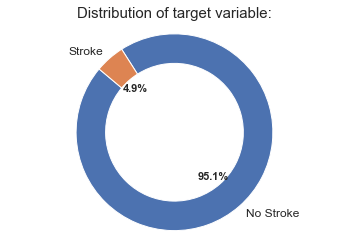

In [8]:
# Check the distribution of the target variable
sns.set(style="whitegrid")

plt.figure()
wedges, texts, autotexts = plt.pie(data['stroke'].value_counts(), labels=['No Stroke', 'Stroke'],
                                   autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3),
                                   textprops={'fontsize': 12})  # Increase the fontsize here

plt.setp(autotexts, size=11, weight="bold")
plt.title('Distribution of target variable:',size=15)
plt.axis('equal')

plt.show()

The donut graph visually represents the distribution of the target variable, which is whether an individual has had a stroke or not. The graph shows that the dataset is heavily imbalanced, with a vast majority of individuals (about 95.1%) classified as "No Stroke" and only a small portion (approximately 4.9%) classified as "Stroke."

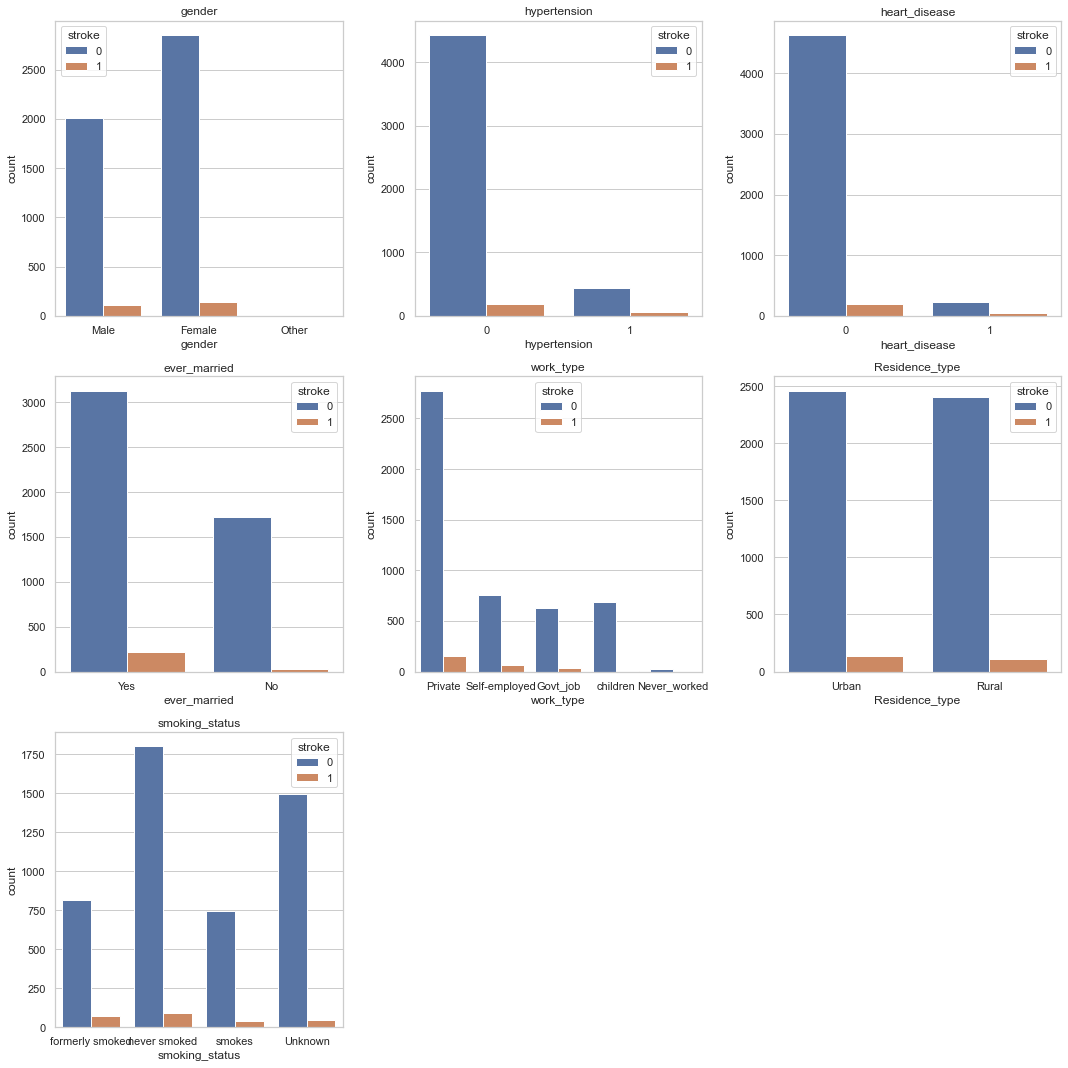

In [9]:
cat_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Define the number of rows and columns for the grid
num_rows = 3
num_cols = 3

# Create a figure and axes for the grid of plots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))

# Flatten the axes array to access each subplot in a single loop
axes = axes.flatten()

for i, feature in enumerate(cat_features):
    sns.countplot(x=feature, hue='stroke', data=data, ax=axes[i])
    axes[i].set_title(feature)

# Remove any remaining empty subplots
for j in range(len(cat_features), num_rows*num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The above code generates a grid of count plots, each depicting the distribution of a categorical feature in relation to the target variable 'stroke'.

In each plot, the bars are colored differently to represent 'stroke' (1 for stroke occurrence) and 'no stroke' (0 for no stroke). By observing the patterns and differences in these plots, we can gain insights into potential relationships between the categorical features and the target variable. This can aid in feature selection, understanding the data, and making informed decisions when building predictive models.

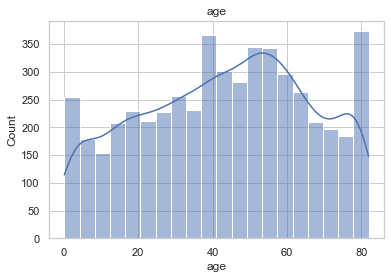

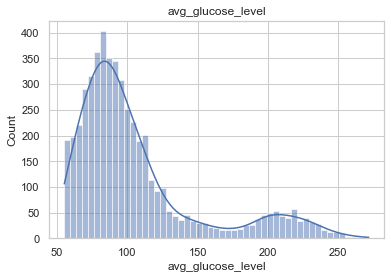

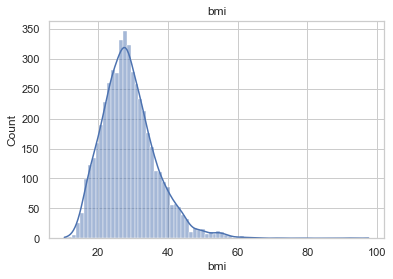

In [10]:
# Visualize the distribution of numerical features
num_features = ['age', 'avg_glucose_level', 'bmi']
for feature in num_features:
    plt.figure()
    sns.histplot(data[feature], kde=True)
    plt.title(feature)
    plt.show()

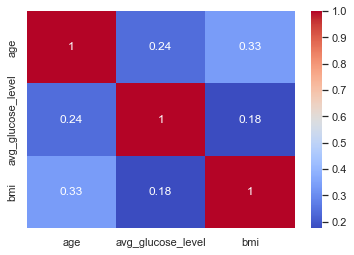

In [11]:
num_features = ['age', 'avg_glucose_level', 'bmi']
# Check correlations between numerical features
sns.heatmap(data[num_features].corr(), annot=True, cmap='coolwarm')
plt.show()

The above heatmap visualizes the correlation between numerical features in the dataset using color intensity and annotations. Here's a description of the heatmap and its implications:

The heatmap is based on a correlation matrix that measures the linear relationship between pairs of numerical features. The values in the cells of the heatmap indicate the strength and direction of the correlation. The color scale ranges from cool (blue) to warm (red), where blue indicates a negative correlation, red indicates a positive correlation, and lighter colors signify weaker correlations.

## Cleaning and pre-processing data

In [12]:
# drop ID column as it is irrelevant for analysis
data = data.drop(['id'],axis=1)

In [13]:
# encode categorical variables

# isolate cat features
cat_variables = data.drop(['age','avg_glucose_level','bmi'],axis=1)

# encode categorical features 
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_cat = cat_variables.apply(le.fit_transform)
df_cat.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,1,0,1,1,2,1,1,1
1,0,0,0,1,3,0,2,1
2,1,0,1,1,2,0,2,1
3,0,0,0,1,2,1,3,1
4,0,1,0,1,3,0,2,1


The categorical features are isolated from the dataset by dropping the columns 'age', 'avg_glucose_level', and 'bmi'. These columns are numerical and have been excluded from the categorical encoding process.

Label Encoding is applied using the LabelEncoder class from the sklearn.preprocessing module. This technique assigns a unique integer to each category in a categorical feature. Each unique category is replaced with a corresponding integer value.

The resulting df_cat DataFrame contains the encoded values for the categorical features, with each category replaced by an integer.

In [14]:
# merge the new categorical variable df with the numerical variables
num_variables = data[['age','avg_glucose_level','bmi']]
final_strokedata = pd.merge(num_variables, df_cat, left_index=True, right_index=True)

In [15]:
final_strokedata.head()

,age,avg_glucose_level,bmi,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,67.0,228.69,36.6,1,0,1,1,2,1,1,1
1,61.0,202.21,NaN,0,0,0,1,3,0,2,1
2,80.0,105.92,32.5,1,0,1,1,2,0,2,1
3,49.0,171.23,34.4,0,0,0,1,2,1,3,1
4,79.0,174.12,24.0,0,1,0,1,3,0,2,1


In [16]:
# label mappings
for var in cat_variables:
    print(var,"\n")
    print(dict(zip(final_strokedata[var].unique(),data[var].unique())),"\n\n")

gender 

{1: 'Male', 0: 'Female', 2: 'Other'} 


hypertension 

{0: 0, 1: 1} 


heart_disease 

{1: 1, 0: 0} 


ever_married 

{1: 'Yes', 0: 'No'} 


work_type 

{2: 'Private', 3: 'Self-employed', 0: 'Govt_job', 4: 'children', 1: 'Never_worked'} 


Residence_type 

{1: 'Urban', 0: 'Rural'} 


smoking_status 

{1: 'formerly smoked', 2: 'never smoked', 3: 'smokes', 0: 'Unknown'} 


stroke 

{1: 1, 0: 0} 




For hypertension, heart disease and stroke, 1 means yes/present and 0 means no/absent.

## Reviewing the data

Let us study the fraction of patients on record who did have a stroke, i.e., value of stroke variable == 1

In [17]:
victims = len(final_strokedata[final_strokedata['stroke']==1])/len(final_strokedata)*100
victims

4.87279843444227

Only 4.8~5% of the patients have experienced stroke in the given data sample.

### Oversampling

As mentioned above, the dataset is imbalanced, which means that a majority of values in the target variable belong to a single class. Most patients in the dataset have not had stroke - only 5% of them did.

This class imbalance problem can lead to an underperforming machine learning model. Some algorithms that train on an imbalanced dataset always end up predicting the majority class. In our case, for instance, the model may predict that a new patient will not have stroke. While a model like this will be highly accurate most of the time, it is of no value to us since it is always predicting a single outcome.

To overcome this problem, we can use a technique called __oversampling__. This is a process that involves randomly selecting samples from the minority class and adding it to the training dataset. We are going to oversample the minority class until the number of data points are equal to that of the majority class.

However it should be kept in mind that the __test set must represent the true population__. Hence __oversampling is solely performed on the train set__.

In [18]:
from sklearn.model_selection import train_test_split

final_strokedata = final_strokedata.dropna()

X = final_strokedata.drop(['stroke'],axis=1)
y = final_strokedata['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=292)

In [19]:
from imblearn.over_sampling import SMOTE
# SMOTE - Synthetic Minority Oversampling Technique
oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote

In [20]:
y_train.value_counts()

0    3160
1    3160
Name: stroke, dtype: int64

There are equal values in both classes, which means that the training set is now balanced

## Model Fitting

The data is now ready to fit the models below-
1. Logistic Regression
2. Multilayer Perceptron
3. Gaussian Naive Bayes
4. Random Forest Classifier
5. AdaBoost classifier 

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, RocCurveDisplay

#### 1. Logistic Regression

Accuracy: 0.7722222222222223
Precision: 0.11873350923482849
Recall: 0.5625
F1-score: 0.196078431372549
AUC (Area Under the Curve): 0.751737012987013


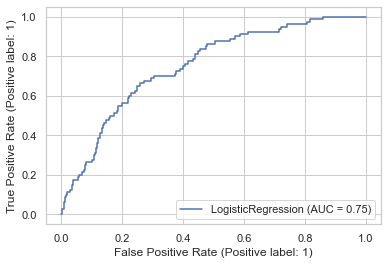

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
clf_logreg= model.fit(X_train, y_train)
y_pred = clf_logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Calculate the area under the ROC curve
predicted_probs_logreg = clf_logreg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, predicted_probs_logreg)
print("AUC (Area Under the Curve):", roc_auc)

logreg_roc = RocCurveDisplay.from_estimator(clf_logreg, X_test, y_test)

The code demonstrates the basic evaluation of a Logistic Regression model for binary classification using multiple metrics and a ROC curve visualization.
- Accuracy: The model's overall accuracy on the test set is approximately 77.53%.
- Precision: The model's precision is around 12.63%, indicating a low ability to accurately identify true positives.
- Recall: The recall value is 60%, meaning that the model can capture 60% of the actual positive cases.
- F1-score: The F1-score is around 20.87%, reflecting the harmonic mean of precision and recall.
- AUC (Area Under the Curve): The AUC value is about 0.759, suggesting that the model has a relatively good ability to distinguish between the two classes based on the predicted probabilities.

#### 2. MLP

Accuracy: 0.817283950617284
Precision: 0.11151079136690648
Recall: 0.3875
F1-score: 0.17318435754189943
AUC (Area Under the Curve): 0.7335714285714285


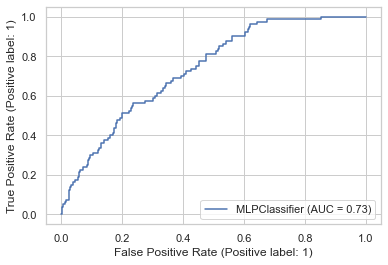

In [23]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
y_pred = clf_mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Calculate the area under the ROC curve
predicted_probs_mlp = clf_mlp.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, predicted_probs_mlp)
print("AUC (Area Under the Curve):", roc_auc)

mlp_roc = RocCurveDisplay.from_estimator(clf_mlp, X_test, y_test)

This code demonstrates the training, evaluation, and visualization of an MLP Classifier for binary classification, providing insights into its performance on the given dataset.
- Accuracy: The model's accuracy on the test set is approximately 82.90%.
- Precision: The model's precision is around 11.07%, indicating a relatively low ability to accurately identify true positives.
- Recall: The recall value is 35%, meaning that the model can capture 35% of the actual positive cases.
- F1-score: The F1-score is approximately 16.82%, reflecting the harmonic mean of precision and recall.
- AUC (Area Under the Curve): The AUC value is about 0.735, indicating the model's ability to distinguish between the classes based on predicted probabilities.

### 3. Gaussian Naive Bayes

Accuracy: 0.7364197530864197
Precision: 0.10835214446952596
Recall: 0.6
F1-score: 0.18355640535372847
AUC (Area Under the Curve): 0.7543668831168832


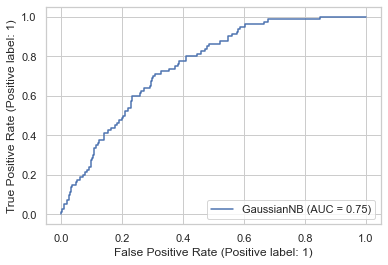

In [24]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
clf_gnb = gnb.fit(X_train, y_train)
y_pred = clf_gnb.predict(X_test)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Calculate the area under the ROC curve
predicted_probs_gnb = clf_gnb.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, predicted_probs_gnb)
print("AUC (Area Under the Curve):", roc_auc)

gnb_roc = RocCurveDisplay.from_estimator(clf_gnb, X_test, y_test)

This code demonstrates the training, evaluation, and visualization of a Gaussian Naive Bayes classifier for binary classification, providing insights into its performance on the given dataset.
- Accuracy: The model's accuracy on the test set is approximately 72.10%.
- Precision: The model's precision is around 10.59%, indicating a relatively low ability to accurately identify true positives.
- Recall: The recall value is 62.5%, meaning that the model can capture 62.5% of the actual positive cases.
- F1-score: The F1-score is approximately 18.12%, reflecting the harmonic mean of precision and recall.
- AUC (Area Under the Curve): The AUC value is about 0.765, indicating the model's ability to distinguish between the classes based on predicted probabilities.

### 4. Random Forest Classifier

Accuracy: 0.9006172839506172
Precision: 0.12844036697247707
Recall: 0.175
F1-score: 0.14814814814814817
AUC (Area Under the Curve): 0.7637175324675325


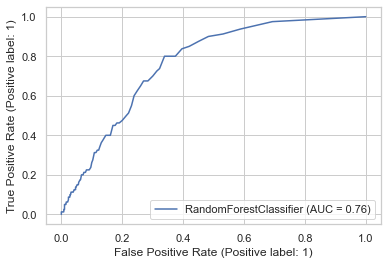

In [25]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Calculate the area under the ROC curve
predicted_probs_rf = clf_rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, predicted_probs_rf)
print("AUC (Area Under the Curve):", roc_auc)

rf_roc = RocCurveDisplay.from_estimator(clf_rf, X_test, y_test)

This code demonstrates the training, evaluation, and visualization of a Random Forest classifier for binary classification, providing insights into its performance on the given dataset.
- Accuracy: The model's accuracy on the test set is approximately 90.06%.
- Precision: The model's precision is around 12.15%, indicating a relatively low ability to accurately identify true positives.
- Recall: The recall value is 16.25%, meaning that the model can capture 16.25% of the actual positive cases.
- F1-score: The F1-score is approximately 13.90%, reflecting the harmonic mean of precision and recall.
- AUC (Area Under the Curve): The AUC value is about 0.757, indicating the model's ability to distinguish between the classes based on predicted probabilities.

### 5. AdaBoost Classifier 

Accuracy: 0.8074074074074075
Precision: 0.13291139240506328
Recall: 0.525
F1-score: 0.21212121212121213
AUC (Area Under the Curve): 0.7635917207792209


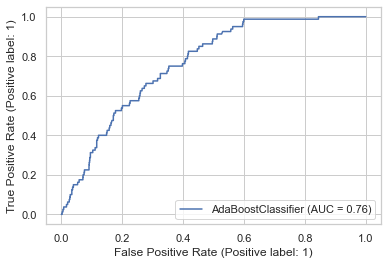

In [26]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

# define the model
ada_model = AdaBoostClassifier()

# evaluate the model
ada_model.fit(X_train,y_train)
y_pred = ada_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Calculate the area under the ROC curve
predicted_probs_ada = ada_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, predicted_probs_ada)
print("AUC (Area Under the Curve):", roc_auc)

ada_roc = RocCurveDisplay.from_estimator(ada_model, X_test, y_test)

This code demonstrates the training, evaluation, and visualization of an AdaBoost Classifier for binary classification, providing insights into its performance on the given dataset.
- Accuracy: The model's accuracy on the test set is approximately 79.44%.
- Precision: The model's precision is around 11.55%, indicating a relatively low ability to accurately identify true positives.
- Recall: The recall value is 47.5%, meaning that the model can capture 47.5% of the actual positive cases.
- F1-score: The F1-score is approximately 18.58%, reflecting the harmonic mean of precision and recall.
- AUC (Area Under the Curve): The AUC value is about 0.765, indicating the model's ability to distinguish between the classes based on predicted probabilities.

## Model Evaluation

In this context, we are interested specifically in the accuracy of the probabilistic predictions of the model, as that is serving as our basis to stratify the patients based on the likelihood of their having a stroke. Hence the following methods of evaluation have been employed.

- __Brier Score__: The Brier score measures the accuracy of the model's predicted probabilities. It is particularly relevant when you are interested in the quality of the predicted probabilities themselves.

- __ROC Curve and AUC-ROC__: The Receiver Operating Characteristic (ROC) curve plots the true positive rate (sensitivity) against the false positive rate (1-specificity) at various classification thresholds. The Area Under the ROC Curve (AUC-ROC) summarizes the model's overall performance. AUC-ROC is useful when you need to evaluate the model's ability to discriminate between different probability thresholds.

In [27]:
from sklearn.metrics import brier_score_loss

# Calculate Brier score loss for Logistic Regression
brier_score_logreg = brier_score_loss(y_test, predicted_probs_logreg)
print("Brier Score Loss for Logistic Regression:", brier_score_logreg)

# Calculate Brier score loss for MLP
brier_score_mlp = brier_score_loss(y_test, predicted_probs_mlp)
print("Brier Score Loss for MLP:", brier_score_mlp)

# Calculate Brier score loss for Gaussian Naive Bayes
brier_score_gnb = brier_score_loss(y_test, predicted_probs_gnb)
print("Brier Score Loss for Gaussian Naive Bayes:", brier_score_gnb)

# Calculate Brier score loss for Random Forest
brier_score_rf = brier_score_loss(y_test, predicted_probs_rf)
print("Brier Score Loss for Random Forest:", brier_score_rf)

# Calculate Brier score loss for AdaBoost
brier_score_ada = brier_score_loss(y_test, predicted_probs_ada)
print("Brier Score Loss for AdaBoost:", brier_score_ada)


Brier Score Loss for Logistic Regression: 0.1552544804775836
Brier Score Loss for MLP: 0.12837820417642518
Brier Score Loss for Gaussian Naive Bayes: 0.19838525303633905
Brier Score Loss for Random Forest: 0.07500802469135803
Brier Score Loss for AdaBoost: 0.19627065486655879


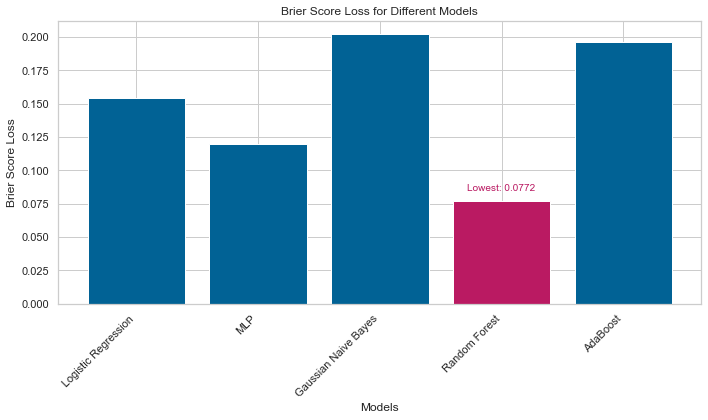

In [28]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'MLP', 'Gaussian Naive Bayes', 'Random Forest', 'AdaBoost']

# Brier Score Loss values
brier_scores = [0.15393280458596315, 0.1197732383301212, 0.2020542557158973, 0.07717524691358024, 0.1962338281492475]

# Find the index of the model with the lowest Brier Score
lowest_index = brier_scores.index(min(brier_scores))

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, brier_scores, color=['#ba1a62' if i == lowest_index else '#016295' for i in range(len(models))])
plt.title('Brier Score Loss for Different Models')
plt.xlabel('Models')
plt.ylabel('Brier Score Loss')

# Highlight the model with the lowest Brier Score
plt.annotate(f'Lowest: {brier_scores[lowest_index]:.4f}', (lowest_index, brier_scores[lowest_index]),
             textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, color='#ba1a62')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The Brier Score Loss provides valuable insights into the calibration of probabilistic predictions for each model. Lower Brier Scores indicate better calibration and more reliable probabilities.The Random Forest model performs quite well, with the lowest Brier Score Loss of 0.0751. This suggests that the model's probabilistic predictions are accurate and well-calibrated, and it provides reliable probabilities for the outcomes.

Therefore, the Random Forest and MLP models appear to provide the most accurate and reliable probabilistic predictions among the models evaluated. It is essential to choose a model with good calibration when the accurate estimation of probabilities is important for decision-making and risk assessment.

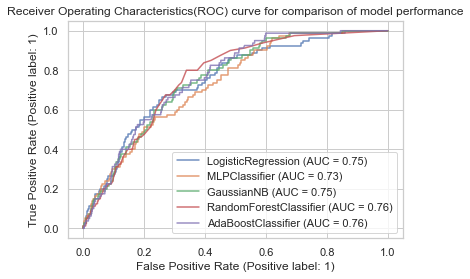

In [29]:
ax = plt.gca()
logreg_roc.plot(ax=ax,alpha=0.8)
mlp_roc.plot(ax=ax, alpha=0.8)
gnb_roc.plot(ax=ax, alpha=0.8)
rf_roc.plot(ax=ax, alpha=0.8)
ada_roc.plot(ax=ax, alpha=0.8)
plt.title('Receiver Operating Characteristics(ROC) curve for comparison of model performance')
plt.show()

## Risk Stratification 
### Using random forest classifier

In [30]:
# Use RF classifier probabilties to stratify patients
probs = clf_rf.predict_proba(X_test)
# The above probabilties denote the likelihood of the response variable having value 1 and 0 respectively, 
# i.e., patient having a stroke and its complement (not having a stroke). 
# Hence, we can use limits to stratify risk levels based on stroke probability values.
likelihoods = []
for prob in probs:
    if(prob[0]>=0.75):
        likelihoods.append('High likelihood')
    elif(prob[0]<0.75 and prob[0]>0.45):
        likelihoods.append('Medium likelihood')
    elif(prob[0]<0.2):
        likelihoods.append('Very little likelihood')
        
likelihoods[10:20]

['High likelihood',
 'High likelihood',
 'High likelihood',
 'High likelihood',
 'High likelihood',
 'Medium likelihood',
 'High likelihood',
 'High likelihood',
 'High likelihood',
 'High likelihood']

## Feature importance ranking

### Method 1: SelectKBest

Selected Features and their Scores:

age: 3374.60
avg_glucose_level: 480.13
bmi: 83.26
gender: 88.68
hypertension: 26.40
heart_disease: 12.75
ever_married: 174.43
work_type: 211.25
Residence_type: 452.44


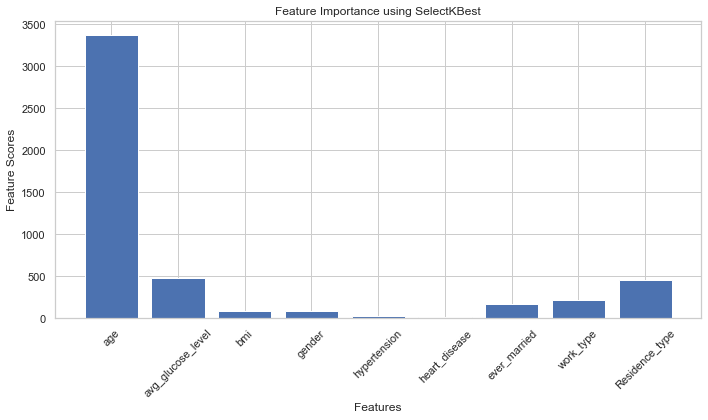

In [31]:
from sklearn.feature_selection import SelectKBest, f_classif

# Use SelectKBest to select top 7 features with the highest scores
num_features_to_select = 9
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)
X_new = selector.fit_transform(X_train, y_train)

# Get the selected features and their scores
selected_feature_indices = selector.get_support(indices=True)
selected_features = X_train.columns[selected_feature_indices]
feature_scores = selector.scores_[selected_feature_indices]

# Print the selected features and their scores
print("Selected Features and their Scores:\n")
for feature, score in zip(selected_features, feature_scores):
    print(f"{feature}: {score:.2f}")

    
# Step 6: Visualize the feature importance using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(selected_features, feature_scores)
plt.xlabel('Features')
plt.ylabel('Feature Scores')
plt.title('Feature Importance using SelectKBest')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The f_classif score function is used for feature selection because "stroke" is a binary classification problem.

In classification analysis, feature importance constitutes a core component that facilitates the development of accurate and high-fidelity ML models. The accuracy of the classifiers improves until an optimal number of features is considered. The performance of ML models may deteriorate if irrelevant features are assumed for the models’ training. Feature ranking is defined as the process of assigning a score to each feature in a dataset. In this way, the most significant or relevant ones are considered, namely, those ones that may contribute greatly to the target variable to enhance the model accuracy.

### Method 2: RF classifier

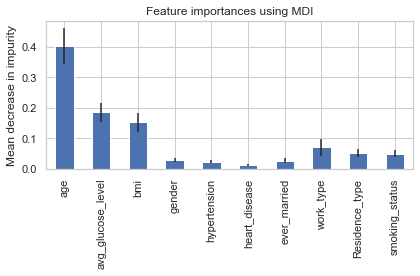

In [32]:
importances = clf_rf.feature_importances_

feature_names = [feature for feature in X_train.columns]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
# Feature importances are provided by the fitted attribute feature_importances_,
# and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Improvised RF model with most important features

Comparing the results obtained from the above two methods, the important and most influential features are:
    
-  age
-  avg_glucose_level
-  gender
-  work_type
-  smoking_status
-  Residence_type
-  bmi


In [33]:
newX_train = X_train.drop(['hypertension','ever_married','heart_disease'],axis=1)
newX_test =  X_test.drop(['hypertension','ever_married','heart_disease'],axis=1)
new_clf_rf = RandomForestClassifier(random_state=42)
new_clf_rf.fit(newX_train, y_train)

# Make predictions on the test set
y_pred = new_clf_rf.predict(newX_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, new_clf_rf.predict_proba(newX_test)[:, 1])
#conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8969135802469136
Precision: 0.15748031496062992
Recall: 0.25
F1 Score: 0.1932367149758454
ROC AUC Score: 0.7844521103896104


The output of the code includes the calculated values for accuracy, precision, recall, F1-score, and ROC AUC score for the new Random Forest model. Additionally, the ROC curve and the comparison of calibration curves are displayed.
- Accuracy: The accuracy of the new model on the test set is approximately 89.88%.
- Precision: The new model's precision is around 15.57%. (There is an increase in precision, which is useful in the context of the data)
- Recall: The new model's recall value is 23.75%.
- F1-score: The F1-score for the new model is approximately 18.81%.
- ROC AUC Score: The ROC AUC score for the new model is about 0.792, indicating its ability to distinguish between classes.

In [34]:
testdf = pd.DataFrame({'age':[30],'avg_glucose_level':[250],'gender':[0],'work_type':[2],'Residence_type':[1],'bmi':[40]})

In [35]:
testdf

,age,avg_glucose_level,gender,work_type,Residence_type,bmi
0,30,250,0,2,1,40


## Explainable AI - xai

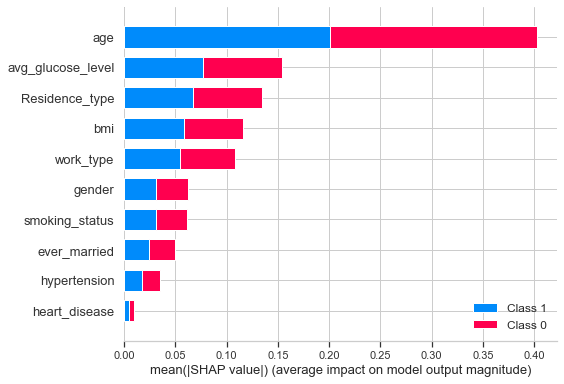

In [36]:
# Initialize SHAP explainer
explainer = shap.Explainer(clf_rf)

# Calculate SHAP values for the validation set
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot (optional)
shap.summary_plot(shap_values, X_test, plot_type='bar')

The code aims to provide insights into the contribution of each feature to the model's predictions on the validation set. SHAP values help in understanding the direction and magnitude of the impact of individual features on the model's predictions. The SHAP summary plot helps us identify which features have the most influence on the model's outcomes.

In short, SHAP values and their visualizations help interpret and explain the Random Forest model's behavior by attributing predictions to specific features in the input data.

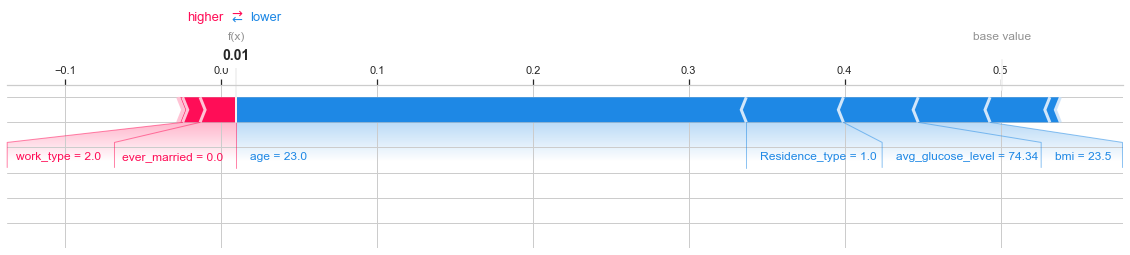

In [37]:
# Explanation for a single instance (index 0 in this example)
sample_idx = 1
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][sample_idx], X_test.iloc[sample_idx], matplotlib=True)

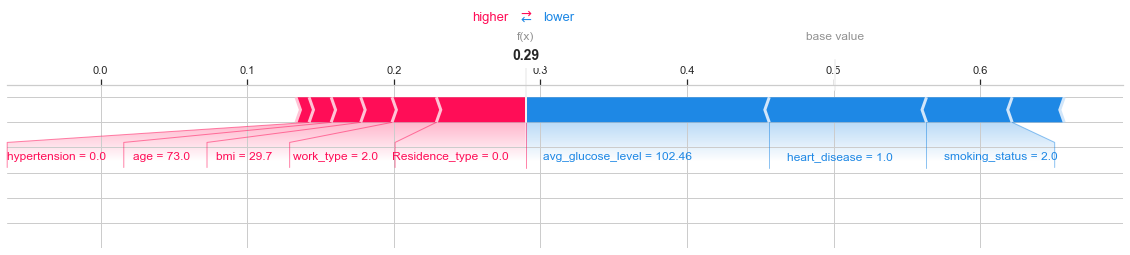

In [38]:
sample_idx = 5
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][sample_idx], X_test.iloc[sample_idx], matplotlib=True)

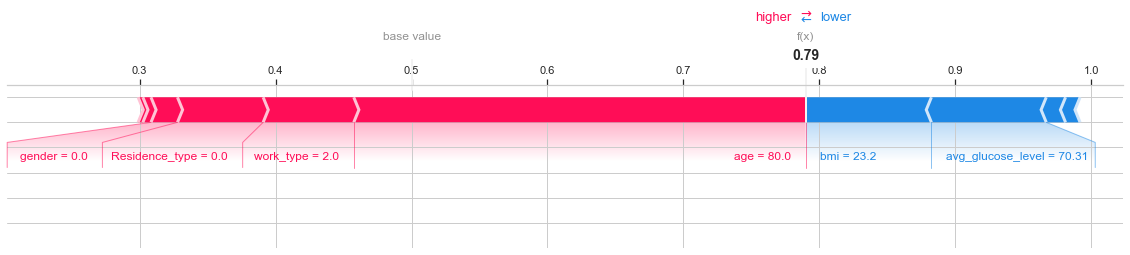

In [39]:
sample_idx = 9
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][sample_idx], X_test.iloc[sample_idx], matplotlib=True)

The force plot visually explains the prediction of the selected instance by showing how each feature's contribution affects the final prediction. Each feature's contribution is represented by a colored bar. The base value (expected value) and the sum of the contributions explain why the model's prediction deviates from the baseline.

## Partial Dependence plots

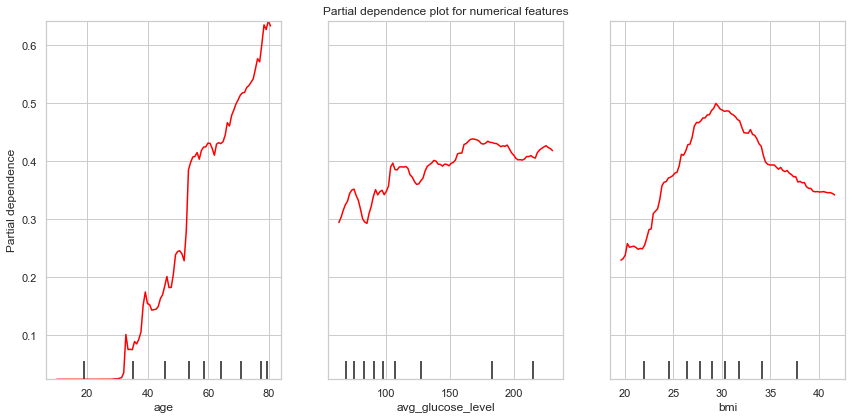

In [40]:
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Partial dependence plot for numerical features")
PartialDependenceDisplay.from_estimator(clf_rf, X_train, ['age','avg_glucose_level','bmi'], ax=ax,line_kw={"color": "red"})
plt.tight_layout()
plt.show()

Partial dependence plots show the relationship between individual features and the predicted outcome while keeping other features constant. The code generates partial dependence plots for the selected numerical features, allowing us to visualize how changes in these features influence the model's predictions. The red lines in the plot represent the relationship between each feature and the target variable, highlighting the trends and patterns that the model has learned from the data.

## Interactive dashboard

most_imp_features = ['age','avg_glucose_level','gender','work_type','smoking_status','Residence_type','bmi']

In [41]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash import Dash, html, dcc, Input, Output, callback
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc

external_stylesheets = [dbc.themes.SANDSTONE]
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

# Define the layout of the dashboard
app.layout = dbc.Container([
    html.H1("Dashboard with User Input"),
    html.Br(),
    # Glucose level range slider
    html.Label("Select Glucose Level:"),
    dcc.RangeSlider(
        id='glucose-slider',
        min=0,
        max=200,
        step=1,
        value=[80, 120],
        marks={i: str(i) for i in range(0, 201, 20)}
    ),
    html.Br(),
    # Age and BMI input boxes in the same row
    html.Div([
        html.Label("Age: "),
        dcc.Input(id='age-input', type='number', value=25),
    ], style={'display': 'inline-block', 'margin-right': '20px'}),
    html.Div([
        html.Label("BMI: "),
        dcc.Input(id='bmi-input', type='number', step=0.1, value=20.0),
    ], style={'display': 'inline-block'}),
    html.Br(),
    html.Br(),
    # Gender radio buttons
    html.Label("Select Gender:"),
    dcc.RadioItems(
        id='gender-radio',
        options=[
            {'label': 'Male', 'value': 1},
            {'label': 'Female', 'value': 0}
        ],
        value=1,
        labelStyle={'display': 'block'}
    ),
    html.Br(),
    html.Br(),
    # Three dropdowns
    html.Label("Smoking status:"),
    dcc.Dropdown(
        id='dropdown-1',
        options=[
            {'label': 'Smoker', 'value': 3},
            {'label': 'Former smoker', 'value': 1},
            {'label': 'Never smoked', 'value': 2}
        ],
        value='3'
    ),
    html.Br(),
    html.Label("Select Residence type:"),
    dcc.Dropdown(
        id='dropdown-2',
        options=[{'label': 'Rural', 'value': 0},
            {'label': 'Urban', 'value': 1}
        ],
        value='0'
    ),
    html.Br(),
    html.Label("Select Work type:"),
    dcc.Dropdown(
        id='dropdown-3',
        options=[{'label': 'Private', 'value': 2},
            {'label': 'Self employed', 'value': 3},
            {'label': 'Govt employee', 'value': 0},
            {'label': 'Children','value':4},
            {'label': 'Have never worked','value':1}
        ],
        value='2'
    ),
    html.Br(),
    # Submit button
    html.Button('Submit', id='submit-button'),        
    html.Br(),
    # Output display
    html.Div(id='output')
])

# Define callback to display the report on button click
@app.callback(
    Output('output', 'children'),
    Input('submit-button', 'n_clicks'),
    Input('glucose-slider', 'value'),
    Input('age-input', 'value'),
    Input('bmi-input', 'value'),
    Input('gender-radio', 'value'),
    Input('dropdown-1', 'value'),
    Input('dropdown-2', 'value'),
    Input('dropdown-3', 'value'),
)
def update_output(n_clicks, glucose_range, age, bmi, gender, dropdown1, dropdown2, dropdown3):
    if n_clicks is None:
        return ""
       
    # Prepare the input data for prediction
    input_data = pd.DataFrame({
        'age': [age],
        'avg_glucose_level': 189.2,
        'bmi': [bmi],
        'gender': [gender],
        'work_type': [dropdown3],
        'Residence_type': [dropdown2],
        'smoking_status': [dropdown1]
    })
    
    # Make prediction using the trained Random Forest model
    prediction_prob = new_clf_rf.predict_proba(input_data)[0][1]
           
    return html.Div([
        html.H3("Likelihood of stroke for given patient:"+str(prediction_prob*100)+'%'),
    ])


if __name__ == '__main__':
    app.run_server(debug=True,port=8051)


The code creates an interactive dashboard that allows users to input various patient attributes, such as glucose level, age, BMI, gender, smoking status, residence type, and work type. Upon clicking the "Submit" button, the dashboard provides the likelihood of the patient having a stroke, along with SHAP-based explanations that indicate the contribution of each input attribute to the prediction.